In [78]:
from astropy.table import Table
from matplotlib import pyplot as plt
%matplotlib notebook
import os
import numpy as np

In [55]:
tabledir = '/Users/k215c316/Virgo/v0-03Jul2020/'
#plotdir = ''

In [56]:
mgstab = Table.read(tabledir+'vf_north_v0_z0mgs.fits')

<IPython.core.display.Javascript object>


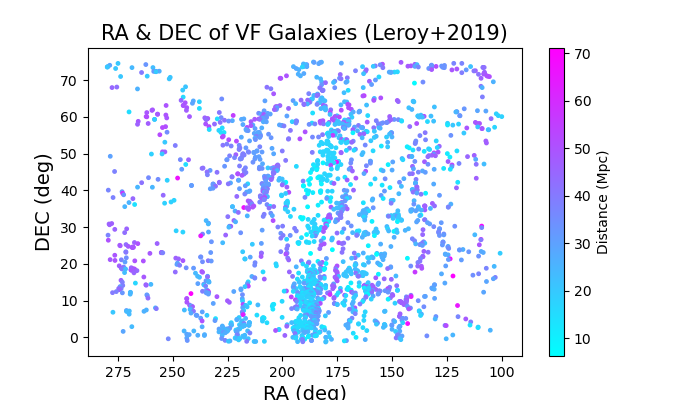

Text(0.5, 1.0, 'RA & DEC of VF Galaxies (Leroy+2019)')

In [57]:
plt.figure(figsize=(7,4))
plt.scatter(mgstab['ra'],mgstab['dec'],c=mgstab['dist_mpc'],cmap='cool',s=6)
cb = plt.colorbar()
cb.set_label('Distance (Mpc)')
ax = plt.gca()
ax.invert_xaxis()
plt.xlabel('RA (deg)',fontsize=14)
plt.ylabel('DEC (deg)',fontsize=14)
plt.title('RA & DEC of VF Galaxies (Leroy+2019)',fontsize=15)

## -----------------------------------------------------------

Below contains Mstar - SFR plots for VF catalogs (D25 from Main catalog, SFR & Mstar data from Leroy+2019 data). 

1. Mstar-SFR color-coded by D25
    -try converting D25 to linear (not log), search for D25 about 70+ arcsec (since W3 FWHM is ~6.5 arcsec)
    -vmin 6.5/2 ("minimally" resolved), vmax 70 arcsec ("maximally" resolved)
2. Mstar-SFR color-coded by WISE Ch.3 SNR
    -search for SNR > 30 (vmin 0, vmax ~200)
3. Select subset of ~100 galaxies with resolved D25 at W3 resolution (10x 6.5 arcsec) and SNR(W3)>30

***Try discrete colorbars***

***Match entries with DR8 catalog; use Legacy Survey viewer to ensure WISE image is clean, centered, and isolated***

In [58]:
os.listdir(tabledir)

['filament_memberships.png',
 'vf_north_v0_nsa_v0_bellmasses.fits',
 'galaxy_sample_prop_HI.fits',
 'vf_north_v0_z0mgs.fits',
 'galaxy_sample_prop_IRAM30m.fits',
 'vf_north_v0_a100_sdssphot.fits',
 'vf_north_v0_hyperleda.fits',
 'vf_north_v0_groups.fits',
 'vf_north_v0_nsa_v0.fits',
 'galaxy_sample_prop_COliterature.fits',
 'vf_north_v0_steer17.fits',
 'README',
 'vf_north_v0_ha.fits',
 'vf_north_v0_main_env_prop_H0_74_0.fits',
 'README_vf_north_v0_main_filament_membership.txt',
 'vf_north_v0_main.fits',
 'vf_north_v0_main_unwise.fits',
 'galaxy_sample_prop_general.fits',
 'virgo_v0_allwise_10arcsec.tbl',
 'vf_north_v0_sfr.fits',
 'vf_north_v0_nsa_bellmasses.fits',
 'vf_north_v0_co.fits',
 'vf_north_v0_a100.fits',
 'vf_north_v0_a100_unwise.fits',
 'vf_north_v0_nsa.fits',
 'vf_north_v0_main_filament_membership.fits',
 'ASTR-792']

In [59]:
hyptab = tabledir+'vf_north_v0_hyperleda.fits'
hyptab = Table.read(hyptab)

In [60]:
mgstab

cntr_01,dist_x,pang_x,vfid_01,ra_01,dec_01,major_01,pgc_name,pgc,ra,dec,gl_deg,gb_deg,resolution,has_fuv,has_nuv,has_wise1,has_wise2,has_wise3,has_wise4,time_fuv,time_nuv,afuv,anuv,rms_fuv,std_fuv,rms_nuv,std_nuv,rms_wise1,std_wise1,rms_wise2,std_wise2,rms_wise3,std_wise3,rms_wise4,std_wise4,sat_effects_fuv,star_area_fuv,star_flux_fuv,star_flag_fuv,sat_effects_nuv,star_area_nuv,star_flux_nuv,star_flag_nuv,sat_effects_wise1,star_area_wise1,star_flux_wise1,star_flag_wise1,sat_effects_wise2,star_area_wise2,star_flux_wise2,star_flag_wise2,sat_effects_wise3,star_area_wise3,star_flux_wise3,star_flag_wise3,sat_effects_wise4,star_area_wise4,star_flux_wise4,star_flag_wise4,galaxy_mask_overlap,galaxy_overlap_flag,flux_fuv,rms_flux_fuv,std_flux_fuv,flux_nuv,rms_flux_nuv,std_flux_nuv,flux_wise1,rms_flux_wise1,std_flux_wise1,flux_wise2,rms_flux_wise2,std_flux_wise2,flux_wise3,rms_flux_wise3,std_flux_wise3,flux_wise4,rms_flux_wise4,std_flux_wise4,dist_mpc,e_dist_dex,mtol,method_mtol,logmass,e_logmass,logsfr,e_logsfr,method_sfr,deltams,absbtc,complete_sample,summary_url,Z0MGSflag
,arcsec,deg,,,,,,,deg,deg,deg,deg,,,,,,,,s,s,mag,mag,MJy / sr,MJy / sr,MJy / sr,MJy / sr,MJy / sr,MJy / sr,MJy / sr,MJy / sr,MJy / sr,MJy / sr,MJy / sr,MJy / sr,,,,,,,,,,,,,,,,,,,,,,,,,,,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Mpc,'dex',solMass / solLum,,log(solMass),'dex',log(solMass/yr),'dex',,'dex',mag,,,
int64,float64,float64,bytes8,float64,float64,float64,bytes10,int64,float64,float64,float64,float64,bytes7,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes8,float64,float64,float64,float64,bytes9,float64,float64,int64,bytes61,bool
1,0.009414,156.601543,VFID0000,185.86877441,74.95224762,10.0,PGC40233,40233,185.868774,74.952248,125.37056,42.043491,gauss15,0,0,1,1,1,1,nan,nan,nan,nan,nan,nan,nan,nan,0.00312,0.02426,0.00333,0.01422,0.011791,0.014441,0.07855,0.097458,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0.0,0,nan,nan,nan,nan,nan,nan,0.0057939,7.5553e-06,0.00012535,0.0031199,1.2099e-05,7.3959e-05,0.0081723,0.00012915,0.00014792,0.016327,0.00044505,0.00055218,24.751,0.256,0.32,W4W1,8.87,0.1,-1.42,0.2,WISE4,nan,-17.733,0,"<a href=""/data/WISE/z0MGS/images/PGC40233.html"">Summary</a>",True
2,0.006563,-89.999997,VFID0001,182.20799255,74.904273987,10.0,PGC38578,38578,182.207993,74.904274,126.640953,41.915878,gauss15,0,0,1,1,1,1,nan,nan,nan,nan,nan,nan,nan,nan,0.00243,0.10631,0.00313,0.05813,0.015214,0.02022,0.10557,0.11844,0,0.0,0.0,0,0,0.0,0.0,0,0,0.062,0.182,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0.0,0,nan,nan,nan,nan,nan,nan,0.068841,1.3577e-05,0.00068928,0.041906,2.3169e-05,0.00038878,0.16824,0.00028556,0.00031763,0.50875,0.00096926,0.0010875,26.2,0.125,0.2,W4W1,9.79,0.1,0.13,0.2,WISE4,nan,-19.53,1,"<a href=""/data/WISE/z0MGS/images/PGC38578.html"">Summary</a>",True
3,0.005206,-46.253519,VFID0002,145.94465637,74.859580994,10.0,PGC27845,27845,145.944656,74.859581,136.712662,36.79419,gauss15,0,1,1,1,1,1,nan,1360.2,nan,0.264,nan,nan,0.00010367,0.00074995,0.00255,0.02188,0.00313,0.0128,0.015816,0.020148,0.11529,0.12144,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0.0,0,nan,nan,nan,0.0037383,1.0514e-06,6.441e-06,0.047143,1.3933e-05,0.00019708,0.029574,2.4697e-05,0.00011694,0.15952,0.00030859,0.000352,0.23224,0.0011564,0.001218,48.106,0.132,0.317,SSFRLIKE,10.35,0.1,0.34,0.2,NUV+WISE4,0.22,-20.714,1,"<a href=""/data/WISE/z0MGS/images/PGC27845.html"">Summary</a>",True
4,0.0126,180.0,VFID0003,185.5730896,74.838386536,10.0,PGC40048,40048,185.57

In [61]:
hyptab

VFID,RA,DEC,NEDname,objname,objtype,de2000,al2000,v,e_v,vopt_1,e_vopt,vrad,e_vrad,bt,e_bt,type_1,bar,ring,multiple,compactness,t,e_t,logd25,e_logd25,logr25,e_logr25,pa,incl,logdc,btc,itc,ubtc,bvtc,m21c,hic,mabs,agnclass,kt,e_kt,it,e_it,ut,vt,mfir,e_ut,e_vt
bytes8,float32,float32,bytes30,bytes28,bytes1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes4,bytes1,bytes1,bytes1,bytes1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes4,float64,float64,float64,float64,float64,float64,float64,float64,float64
VFID0000,185.86877,74.95225,NGC 4363,NGC4363,G,74.9522485,12.3912515,1418.8,7.9,1427.0,42.4,1418.2,11.4,14.544,0.41,Sb,N,N,N,N,3.0,0.5,0.9,0.055,0.1,0.028,10.0,38.96,0.91,14.235,nan,nan,nan,15.208,0.973,-17.733,N/A,nan,nan,nan,nan,nan,nan,nan,nan,nan
VFID0001,182.208,74.904274,NGC 4133,NGC4133,G,74.9042778,12.1472,1331.5,16.4,1312.0,7.0,1357.7,8.1,13.009,0.326,SABb,B,N,N,N,3.0,0.5,1.219,0.034,0.183,0.03,132.24,51.3,1.227,12.562,nan,nan,nan,17.184,4.623,-19.302,N/A,9.372,0.044,nan,nan,nan,nan,11.388,nan,nan
VFID0002,145.94466,74.85958,NGC 2977,NGC2977,G,74.8595778,9.7296442,3049.4,4.7,3072.0,14.0,3048.0,3.6,13.274,0.142,Sb,N,N,N,N,3.0,0.7,1.318,0.053,0.295,0.041,145.0,63.19,1.318,12.697,nan,nan,nan,16.134,3.436,-20.714,N/A,9.798,0.046,nan,nan,nan,nan,12.042,nan,nan
VFID0003,185.57309,74.83839,CGCG 352-030,PGC040048,G,74.8383889,12.3715389,1833.0,9.1,1833.0,9.1,nan,nan,15.027,0.317,E,N,N,N,C,-5.0,2.0,0.94,0.053,0.11,0.028,166.0,59.78,0.958,14.859,nan,nan,nan,nan,nan,-17.566,N/A,11.168,0.046,nan,nan,nan,nan,nan,nan,nan
VFID0004,182.82774,74.80822,UGC 07189,UGC07189,G,74.8082222,12.1885167,1683.0,8.2,1682.5,42.4,1683.0,12.1,14.724,0.323,SBd,B,N,N,N,8.0,0.5,1.135,0.045,0.243,0.027,171.67,64.46,1.141,14.108,nan,nan,nan,15.791,1.682,-18.189,N/A,11.357,0.077,nan,nan,nan,nan,nan,nan,nan
VFID0005,173.13419,74.62754,NGC 3752,NGC3752,G,74.6275401,11.5422789,1920.1,8.1,1961.0,14.0,1917.2,3.7,13.611,0.325,SABa,B,N,N,N,2.1,0.5,1.21,0.032,0.378,0.023,151.68,71.53,1.215,12.93,12.443,nan,nan,16.224,3.294,-19.268,N/A,10.442,0.084,12.536,0.078,nan,13.81,13.272,nan,0.1
VFID0006,121.91241,74.58463,UGC 04202,UGC04202,G,74.5846308,8.1274936,2333.0,13.8,2296.0,15.0,2342.0,7.4,16.0,0.5,Sc,N,N,N,N,5.9,0.4,0.954,0.044,0.68,0.028,172.13,83.94,0.943,14.66,nan,nan,nan,nan,nan,-18.213,N/A,13.271,0.135,nan,nan,nan,nan,nan,nan,nan
VFID0007,118.2363,74.57653,KUG 0746+747,PGC022064,G,74.576533,7.88242,2346.0,7.6,2346.0,60.0,2346.0,10.9,16.32,0.5,Sc,N,N,N,N,4.6,2.6,0.893,0.056,0.473,0.028,177.0,74.48,0.887,15.409,nan,nan,nan,15.271,-0.138,-17.465,N/A,13.702,0.278,nan,nan,nan,nan,nan,nan,nan
VFID0008,274.94318,74.56839,NGC 6643,NGC6643,G,74.5683889,18.3295444,1484.5,1.9,1487.0,3.2,1483.0,2.5,11.757,0.084,Sc,N,N,N,N,5.2,0.5,1.521,0.023,0.309,0.027,37.17,62.72,1.533,10.963,9.945,-0.131,0.513,13.84,2.876,-20.658,N/A,8.284,0.017,10.059,0.058,11.717,11.107,10.332,0.084,0.055


<IPython.core.display.Javascript object>


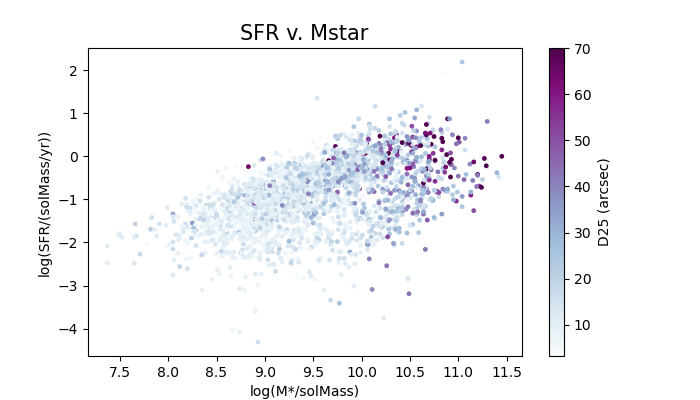

<IPython.core.display.Javascript object>


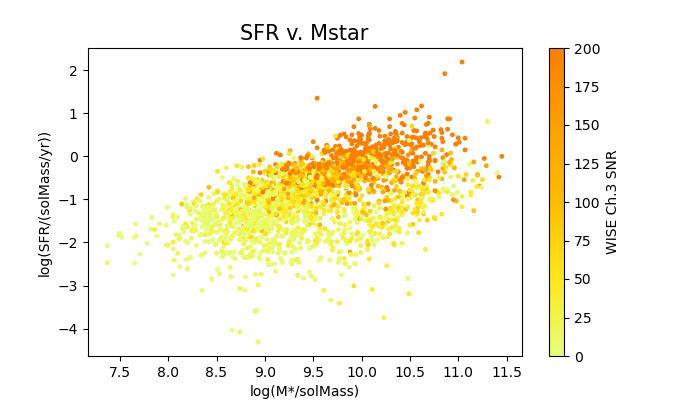

Text(0.5, 1.0, 'SFR v. Mstar')

In [62]:
Mstar = mgstab['logmass']  #x axis
SFR = mgstab['logsfr']   #y axis; frequently deriven from WISE C4 data
D25 = 10**(hyptab['logd25'])

plt.figure(figsize=(7,4))
plt.scatter(Mstar,SFR,c=D25,vmin=3.25,vmax=70,cmap='BuPu',s=6)
cb = plt.colorbar()
cb.set_label('D25 (arcsec)')
plt.xlabel('log(M*/solMass)')
plt.ylabel('log(SFR/(solMass/yr))')
plt.title('SFR v. Mstar', fontsize=15)

snr = mgstab['flux_wise3']/mgstab['std_flux_wise3']

plt.figure(figsize=(7,4))
plt.scatter(Mstar,SFR,c=snr,vmin=0,vmax=200,cmap='Wistia',s=6)
cb2 = plt.colorbar()
cb2.set_label('WISE Ch.3 SNR')
plt.xlabel('log(M*/solMass)')
plt.ylabel('log(SFR/(solMass/yr))')
plt.title('SFR v. Mstar', fontsize=15)

#mgs table:
#flux_wise3/std_flux_wise3


## Flag Demonstration (with bools!)

a = np.arange(10)
b = a+5
bool_gt5 = (a>5) & (b>5)
bool_gt5

In [63]:
a[bool_gt5]

array([6, 7, 8, 9])

In [64]:
bool_or = (a>5) | (b<10)
bool_or

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True])

In [97]:
#extract a sample of about 100 galaxies...
#initial attempt yielded ~1000 (with d25>4 and snr>30); now using larger values to better constrain data

d25_flag = ((10**(hyptab['logd25'])) > 25)
snr_flag = ((mgstab['flux_wise3']/mgstab['std_flux_wise3'])>100)
gal_flag = d25_flag & snr_flag

<IPython.core.display.Javascript object>


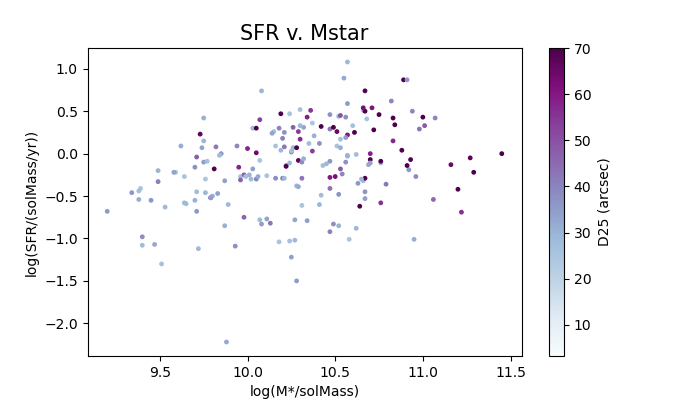

Text(0.5, 1.0, 'SFR v. Mstar')

In [98]:
gal_flag
plt.figure(figsize=(7,4))
plt.scatter(Mstar[gal_flag],SFR[gal_flag],c=D25[gal_flag],vmin=3.25,vmax=70,cmap='BuPu',s=6)
cb = plt.colorbar()
cb.set_label('D25 (arcsec)')
plt.xlabel('log(M*/solMass)')
plt.ylabel('log(SFR/(solMass/yr))')
plt.title('SFR v. Mstar', fontsize=15)

In [99]:
len(hyptab[gal_flag]) #relative to 6860 of unflagged sample size

202

In [100]:
from astropy.io import ascii
from astropy.io import fits

In [101]:
hyp = hyptab[gal_flag]
hyp.write('sample3.fits')

In [102]:
#GALFIT candidates --> observations with LegacySurvey "WISE 12-micron dust map" filter; "exclusion" candidates
#nominated if they either intersected a nearby galaxy, were superimposed by a foreground star, or appeared "noisy"

#row exclusions: 2, 3, 7, 17, 19, 20, 23, 28, 49, 50, 64, 67, 70, 73, 89, 90, 96, 98, 102, 105,
#                107, 111, 112, 114, 120, 122, 126, 127, 136, 142, 146, 147, 150, 151, 162, 171, 197